### DIMENSION REDUCTION ON SEA SURFACE TEMPERATURE DATA USING PRINCIPAL COMPONENT ANALYSIS
#### Mohamad Tio Faizin

PCA merupakan sebuah teknik untuk membangun variabel - variabel baru yang merupakan kombinasi linear dari variabel - variabel asli. Jumlah maksimum dari variabel - variabel baru akan sama dengan jumlah dari variabel - variabel lama, serta tidak saling berkorelasi. Dengan menggunakan PCA maka nantinya akan ditemukan dan dianalisis pola spasial dan temporal dari variabilitas, variasi waktu, dan ukuran pentingnya setiap data.

### Import Modul

Import modul - modul yang dibutuhkan. Daftar modul yang dibutuhkan adalah:
1. Numpy
2. Matplotlib - pyplot
3. Scipy - stats
4. Pylab
5. Basemap - mpl_toolkits.basemap
6. cm - mpl_toolkits.basemap

Keterangan dimensi:
- nx = 86
- ny = 41
- nt = 192
- yr = 1975 - 1990

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
from numpy import*
import numpy as np
from scipy import stats
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Baca Data Spasiotemporal

Membaca data spasiotemporal dari SST Pasifik menggunakan fungsi numpy.fromfile dengan ukuran (nt,nx,ny)

In [2]:
nt = 192
nx = 86
ny = 41

dset=np.fromfile('pasifik1.dat', dtype=np.float32)
data=np.reshape(dset,(nt,ny,nx))
data.shape

(192, 41, 86)

### Membuang Seasonal Mean

Membuang seasonal mean bertujuan untuk menghilangkan gangguan faktor variasi musiman pada data sehingga data dapat diinterpretasikan dengan benar. Pada modul ini gunakan fungsi stats.zscore(data yang akan dibuang seasonal meannya) pada modul scipy. 

In [3]:
for i in range (0,12):
    data[np.arange(i,192,12),:,:]=stats.zscore(data[np.arange(i,192,12),:,:])

### Mengubah Dimensi Data

Data yang memiliki ukuran 3 dimensi akan diubah (gunakan fungsi reshape) menjadi dua dimensi, tanpa mengubah banyaknya jumlah waktu (nt) pada data

In [4]:
new_data = np.reshape(data,(nt,ny*nx))
new_data.shape

(192, 3526)

### Membuang Data yang bernilai NaN

In [5]:
#BUANG NaN
id = new_data[25,:]
idNaN = find(isnan(id))
idNaN = list(idNaN)
X = np.delete(new_data,idNaN,1)
np.any(np.isnan(X))

False

In [6]:
X.shape

(192, 3132)

### Mengaplikasikan PCA Menggunakan Fungsi Princomp

Mendefinisikan fungsi princomp dalam python untuk mengaplikasikan PCA. Pada fungsi princomp ini terdapat 3 variabel yaitu eof, latent, dan score. EOF (Empirical Orthogonal Function) merupakan matriks dimana setiap kolomnya terdiri dari koefisien dari 1 PC. Score merepresentasikan pola temporal dari PC, dan latent merepresentasikan pola temporal dari PC

In [7]:
#PCA

from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure

def princomp(A):
 """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

 Returns :  
  coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
  score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
  latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
 """
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
 [latent,coeff] = linalg.eig(cov(M)) # attention:not always sorted
 score = dot(coeff.T,M) # projection of the data in the new space
 return coeff,score,latent

Setelah mendefinisikan fungsi princomp, gunakan fungsi princomp untuk mengaplikasikan PCA pada data yang telah dibuang *seasonal * *meannya*

In [8]:
#PCA menggunakan fungsi princomp
#eofs, score, latent=princomp(X)
eofs, score, latent=princomp(X)

In [9]:
latent

array([ 8.52963940e+02+0.00000000e+00j,  3.48792938e+02+0.00000000e+00j,
        2.08169795e+02+0.00000000e+00j, ...,
       -3.76005362e-17+4.43454435e-17j, -3.76005362e-17-4.43454435e-17j,
        2.19642606e-16+0.00000000e+00j])

### Scaling Nilai Eigen yang Didapatkan dari PCA

Scaling ini digunakan untuk mengetahui persentase variansi yang dapat dijelaskan menggunakan PCA. Gunakan persamaan rasio perbandingan nilai eigen dengan jumlah nilai eigen dikali 100 persen. Ambil nilai eigen yang bernilai real saja

In [10]:
latent_real = np.real(latent)
jumlaheigen = np.sum(latent_real)
eigen = (latent_real / jumlaheigen)*100

In [11]:
latent.size

3132

### Plot Nilai Eigen (yang Telah Dilakukan Scaling)

(-3, 100)

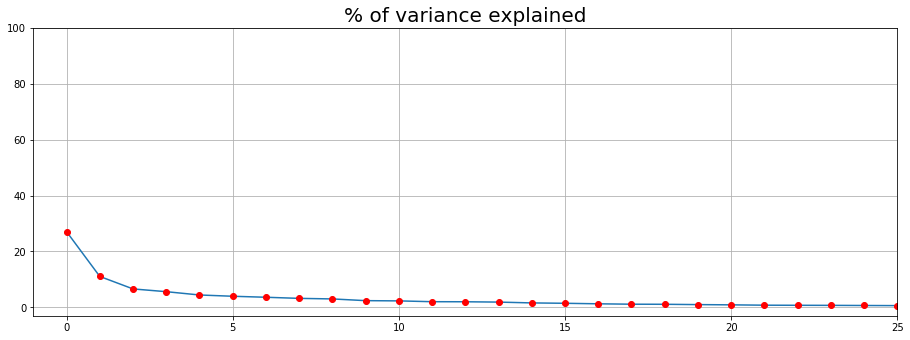

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 1])
ax.plot(eigen)
ax.plot(eigen,'ro')
ax.set_title('% of variance explained',fontsize=20)
ax.grid()
ax.set_xlim([-1,25])
ax.set_ylim([-3,100])


### Memilih Nilai PC yang akan diplot

Setelah melihat variansi yang dapat dijelaskan oleh nilai eigen yang telah diplot, pilih PC ke berapa yang bisa merepresentasikan variansinya. Kemudian ubahlah dimensinya spasialnya sesuai nx dan ny. Kemudian buanglah data yang memiliki nilai NaN.

In [15]:
#i=0
pc=new_data[25,:]
pc=np.reshape(pc,(ny,nx))
pc[~isnan(pc)]=eofs[:,0]#PC 1 untuk spasial
pc.shape

(41, 86)

In [16]:
pc[~isnan(pc)].max()

0.02346309

Setelah berhasil mengatur PC spasial, aturlah PC temporal dengan mengambil bagian data yang real. Ambil nilai PC temporal yang sama dengan PC spasial.

In [17]:
pc_temporal = np.real(score[0,:])
pc_temporal.shape

(192,)

### Plot Pola Spasial dari PC

In [18]:
#Berikut adalah inisiaslisasi untuk plot spasial PC menggunakan modul basemap.Proyeksi yang digunakan menggunakan mercator.
map = Basemap(projection='cyl', lat_0 = -40, lon_0 = 120,
    resolution = 'l', area_thresh = 0.1,
    llcrnrlon=120, llcrnrlat=-40,
    urcrnrlon=290, urcrnrlat=40)

Definisikan warna colormap sesuai selera praktikan. Warna yang digunakan pada modul ini adalah 'RdYlBu'

In [32]:
cmap = 'RdYlBu_r'

Definisikan nilai longitude dan latitude (nx dan ny) menggunakan fungsi map.makegrid(x,y)

In [33]:
lons,lats= map.makegrid(nx,ny)
lons,lats

(array([[120., 122., 124., ..., 286., 288., 290.],
        [120., 122., 124., ..., 286., 288., 290.],
        [120., 122., 124., ..., 286., 288., 290.],
        ...,
        [120., 122., 124., ..., 286., 288., 290.],
        [120., 122., 124., ..., 286., 288., 290.],
        [120., 122., 124., ..., 286., 288., 290.]], dtype=float32),
 array([[-40., -40., -40., ..., -40., -40., -40.],
        [-38., -38., -38., ..., -38., -38., -38.],
        [-36., -36., -36., ..., -36., -36., -36.],
        ...,
        [ 36.,  36.,  36., ...,  36.,  36.,  36.],
        [ 38.,  38.,  38., ...,  38.,  38.,  38.],
        [ 40.,  40.,  40., ...,  40.,  40.,  40.]], dtype=float32))

Plot pola spasial dari PC yang dipilih menggunakan fungsi map.contourf(x,y,variabel pc, variabel cmap yang telah didefinisikan)

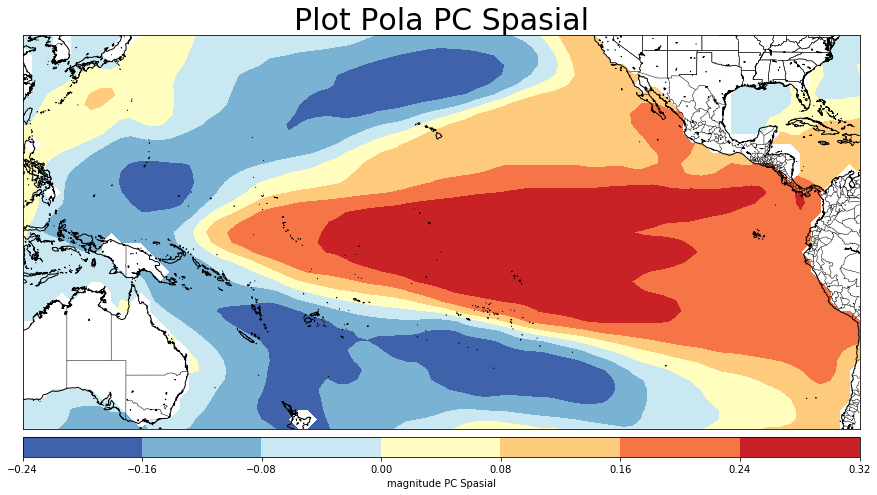

In [34]:
#for i in range(0,5):    
fig=plt.figure(figsize=(15,15))
map.drawcoastlines()
map.drawstates()
map.drawcountries()
#map.drawcounties() # you can even add counties (and other shapefiles!)
    
plt.title('Plot Pola PC Spasial',fontsize=30)
    
spasial = map.contourf(lons,lats,pc,cmap=cmap)
cb = map.colorbar(spasial,"bottom", size="5%", pad="2%")
cb.set_label('magnitude PC Spasial')


Plot garis pantai sehingga terlihat jelas perbedaan antara daratan dan lautan. Cari fungsi - fungsi plotting di internet untuk memperbagus plot. Berikan colorbar sebagai acuan analisisnya. Dan plot PC sesuai yang diinginkan.

In [ ]:
data

### Plot Pola PC Temporal

In [ ]:
time = np.linspace(1975, 1990, pc_temporal.size)
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0.1, 0.75, 2, 1])
ax.plot(time,pc_temporal,"b")
ax.grid()
ax.set_xlim([1975,1990])
ax.set_xlabel('time')
ax.set_ylabel('magnitude')
ax.set_title('Plot Pola PC Temporal',fontsize=30)

In [ ]:
score[:,0].shape

In [ ]:
latent.shape

In [ ]:
192*41*86

In [ ]:
lons,lats= map.makegrid(nx,ny)
lons,lats

In [ ]:
#from eofs.standard import Eof
#from eofs.examples import example_data_path

#coslat = np.cos(np.deg2rad(lats[:,0]))
#wgts = np.sqrt(coslat)[..., np.newaxis]
#solver = Eof(new_data, weights=wgts)

In [ ]:
#reconstruction = solver.reconstructedField(0)

In [ ]:
#reconstruction.shape

In [25]:
recon = np.empty((192,3132))
for i in range (0,pc_temporal.size):
    recon[i,:] = eofs[:,0]*pc_temporal[i]

In [26]:
recon.shape

(192, 3132)

In [27]:
pc_hasil_recon = np.empty((192,3526))
for i in range(0,pc_temporal.size):
    try:
        pcpc = new_data[i,:]
        pcpc[~isnan(pcpc)]=recon[i,:]
        pc_hasil_recon[i,:] = pcpc
    except:
        #print('error di looping ke-',i)
        pcpc = new_data[i,:]
        pcpc[~isnan(pcpc)][:-1]=recon[i,:]
        pc_hasil_recon[i,:] = pcpc
        continue

In [28]:
pc_hasil_reconFIX = pc_hasil_recon.reshape(192,41,86)
pc_hasil_reconFIX.shape

(192, 41, 86)

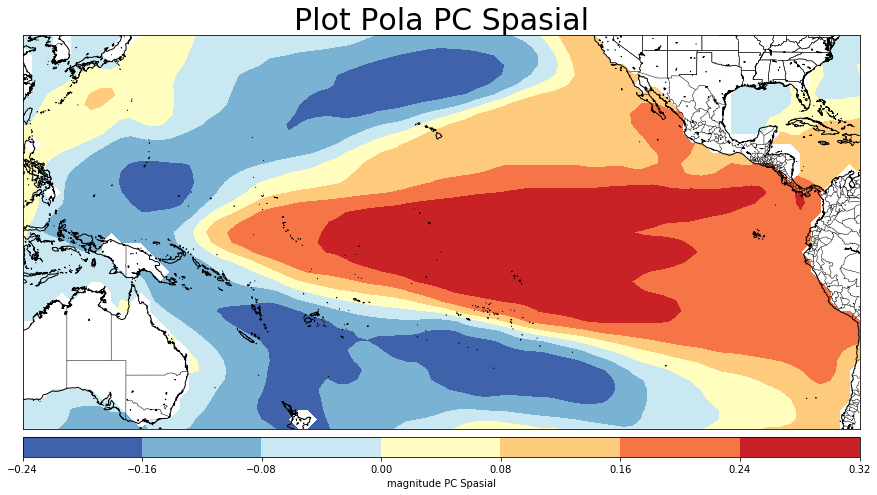

In [29]:
#for i in range(0,5):    
fig=plt.figure(figsize=(15,15))
map.drawcoastlines()
map.drawstates()
map.drawcountries()
#map.drawcounties() # you can even add counties (and other shapefiles!)
    
plt.title('Plot Pola PC Spasial',fontsize=30)
    
spasial = map.contourf(lons,lats,pc_hasil_reconFIX[25,:,:],cmap=cmap)
cb = map.colorbar(spasial,"bottom", size="5%", pad="2%")
cb.set_label('magnitude PC Spasial')


In [30]:
asd = pc_hasil_reconFIX[25,:,:]+np.nanmean(data)

In [40]:
pc_hasil_reconFIX[:,1,1].shape

(192,)

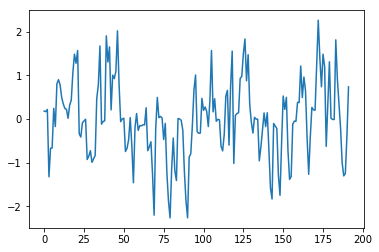

In [42]:
plt.plot(pc_hasil_reconFIX[:,1,1])